In [1]:
from numba import cuda

import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from PIL import Image
import cv2
import math
print(cuda.gpus)

<Managed Device 0>


In [12]:
@cuda.jit
def gray_kernel(picture_in, gray_out):    
    row, col = cuda.grid(2)
    image_rows, image_cols,channel = picture_in.shape
    if (row >= image_rows) or (col >= image_cols): 
        return
    rgb                = picture_in[row][col]
    gray_out[row][col] = 0.299*rgb[0] + 0.587*rgb[1] + 0.114*rgb[2]
    # assuming x and y inputs are same length

(1353, 2074)


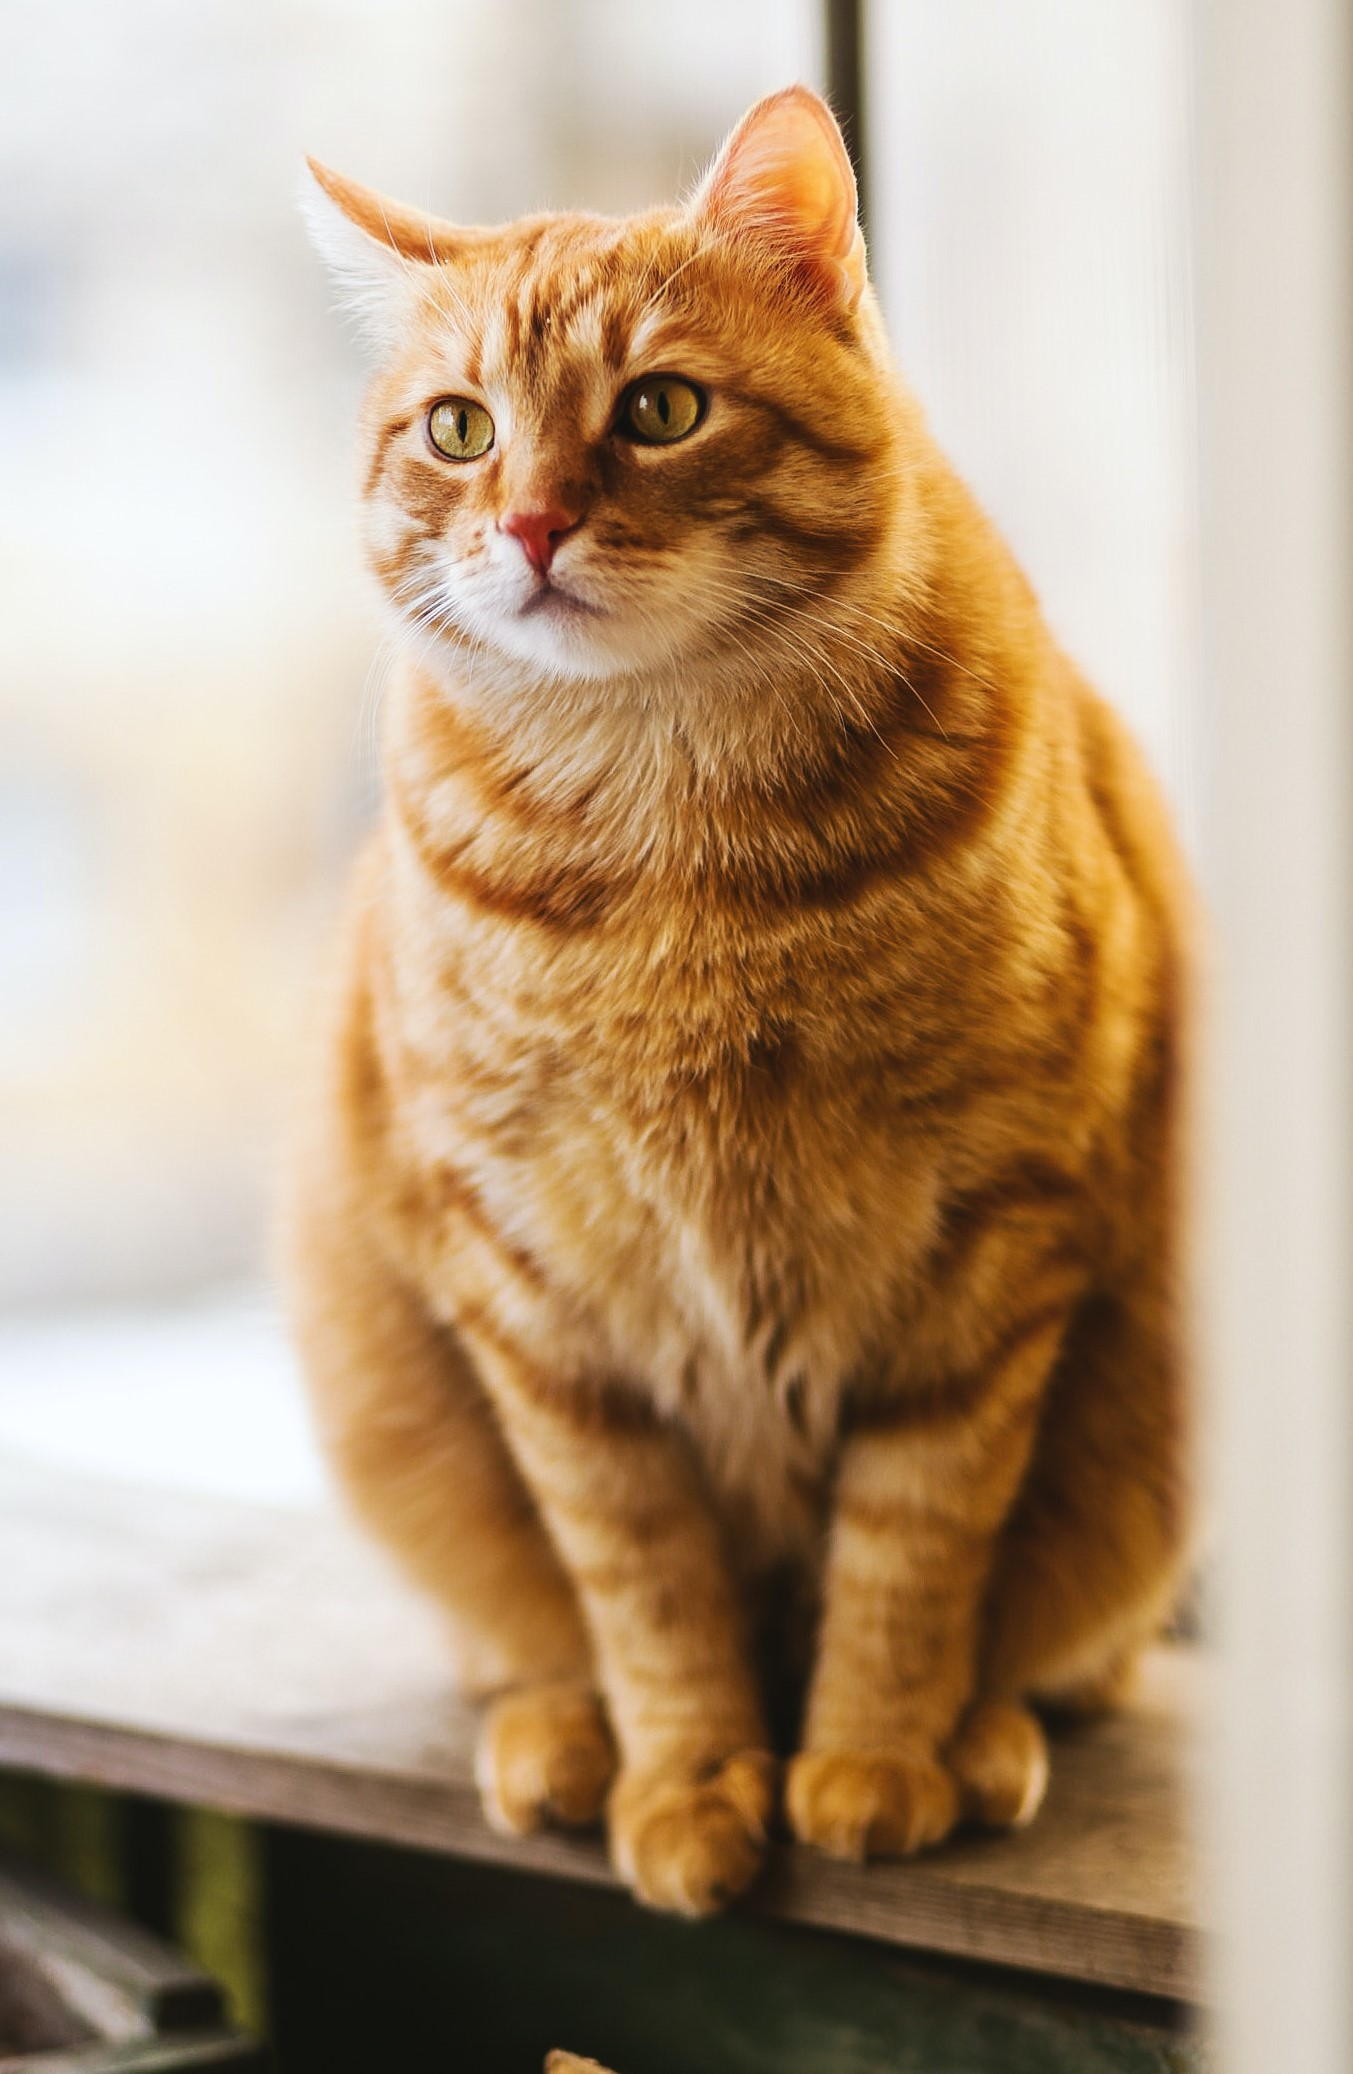

In [3]:
img = Image.open('./Picture/cat-1.jpg')
print(img.size)
img

In [4]:
pixel = np.array(img)
pixel.shape

(2074, 1353, 3)

In [5]:
# Memory Allocation
out_host   = np.empty([pixel.shape[0], pixel.shape[1]],dtype = pixel.dtype)
x_device   = cuda.to_device(pixel)
height     = cuda.to_device(pixel.shape[0])
width      = cuda.to_device(pixel.shape[1])
out_device = cuda.device_array_like(out_host)

In [13]:
threadsperblock = (16, 16)
blockspergrid_x = math.ceil(pixel.shape[0] / threadsperblock[0])
blockspergrid_y = math.ceil(pixel.shape[1] / threadsperblock[1])
blockspergrid = (blockspergrid_x, blockspergrid_y)
gray_kernel[blockspergrid, threadsperblock](x_device, out_device)

In [14]:
out_host = out_device.copy_to_host()

In [15]:
out_host

array([[238, 238, 238, ..., 170, 169, 165],
       [237, 237, 237, ..., 169, 168, 165],
       [237, 237, 237, ..., 169, 168, 165],
       ...,
       [133, 131, 128, ..., 180, 178, 176],
       [134, 126, 122, ..., 180, 179, 175],
       [129, 122, 115, ..., 180, 179, 175]], dtype=uint8)

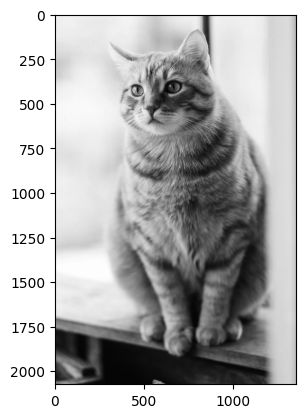

In [16]:
plt.imshow(out_host,cmap='gray')